### Matthew Kearney

In [257]:
import numpy as np
x1 = np.array([4 , 4, 1, 2.5, 4.9, 1.9, 3.5, 0.5, 2, 4.5])
x2 = np.array ([2.9 , 4, 2.5 , 1, 4.5, 1.9, 4, 1.5, 2.1, 2.5])
y = np.array([1,1,-1,-1,1,-1,1,-1,-1,1])

### b. [15 pts] Make a random Lagrangian multiplier array, a where 0 ≤ ai ≤ 0.5. Calculate the bias parameter and the weight vectors w. Find the hyperplane equation. Calculate the margin and determine points in the margin using the obtained hyperplane equation. Find the support vectors if there are any. Using the visualization, justify if this is a good SVM classifier. Predict a class of a point x∗ = [3,3]. Is this point in a margin?

### Make random L

In [258]:
L = []
N= len(y)

## Lagrangian multiplier array
for i in range(0,10):
    L.append(np.random.uniform(0, 0.5))

#put data into single matrix, python arrays
x = np.column_stack((x1, x2))
t = y.tolist()




## Find w

In [259]:
# w = sum from i -> N : lagrangian mult.[i] * y[i] * data[i]
def find_w(lgrng, y, x, w):
    if lgrng == []:
        return w
    else: 
        w = w + lgrng[0]*y[0]*x[0]
        return find_w(lgrng[1:], y[1:], x[1:], w)
    
w1 = find_w(L, t, x1, 0) #using data ~ x1
w2 = find_w(L, t, x2, 0) # using data x2
w = [w1, w2]


print("weights: ", w)


weights:  [1.2512398193989354, 0.658345693036773]


## Find Bias

In [260]:
def find_b(N, y, x, w, b):
    if y == []:
        return b/N
    else:
        b = b + y[0] - np.dot(x[0], w)
        return find_b(N, y[1:], x[1:], w, b)
    
b = find_b(N, t, x, w, 0)

print("b: ", b)


b:  -5.374520594137854


## Give hyperplane eq', and calculate points within the margin

In [261]:
mag = np.linalg.norm(w)
margin = 1 / mag
print("margin: ", margin)
print(f"Hyperplane eq: y = {w1}*x1 + {w2}*x2 + {b}\n\n")

def calc_h(w, x, b):
    return (w[0]*x[0] + w[1]*x[1] + b) 

distances = np.abs(np.dot(x, w) + b) / np.linalg.norm(w)

# Find the indices of the points that lie within the margin
margin_indices = np.where(distances < margin)

# Get the points within the margin
points_in_margin = x[margin_indices]

print("Points within the margin:")
print(points_in_margin)

margin:  0.7072800617703232
Hyperplane eq: y = 1.2512398193989354*x1 + 0.658345693036773*x2 + -5.374520594137854


Points within the margin:
[]


### Find support vectors (there are none)

In [262]:

SVs = []
ct = 0
for i in x:
    h = calc_h(w, i, b)
    print("y*h: ", y[ct]*h)
    if (y[ct]*h == 1):
        SVs.append(i)
    ct = ct + 1

print("support vectors: ", SVs)



y*h:  1.5396411932645293
y*h:  2.2638214556049796
y*h:  2.477416542146986
y*h:  1.5880753526037426
y*h:  3.7191101395824084
y*h:  1.7463081205100082
y*h:  1.6382015459055115
y*h:  3.7613821448832265
y*h:  1.48951499996276
y*h:  1.9019228257492884
support vectors:  []


### Visualizations

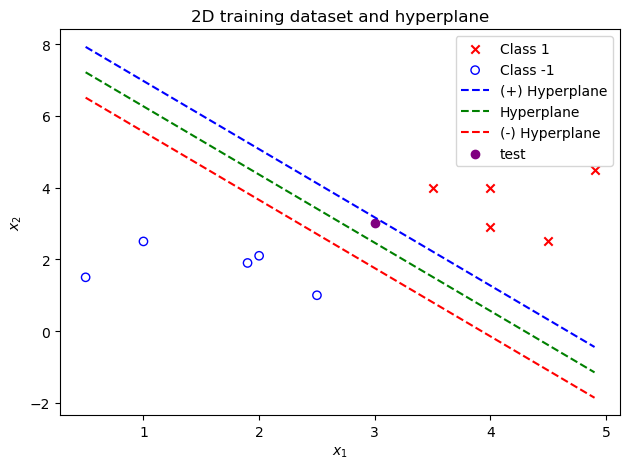

In [263]:
import matplotlib.pyplot as plt

def plot_data_2D(X, t):
    class_1 = np.ravel(t == 1)
    class_0 = np.ravel(t == -1)

    plt.scatter(X[class_1, 0], X[class_1, 1], label='Class 1', marker='x', c='red')
    plt.scatter(X[class_0, 0], X[class_0, 1], label='Class -1', marker='o', edgecolors='blue', facecolors='none')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    # Define range of x1 values
    x1_range = np.linspace(min(x1), max(x1), 100)

# Calculate corresponding x2 values using the hyperplane equation: w1*x1 + w2*x2 + b = 0
    x2_values = (-w[0] * x1_range - b) / w[1] # fit hyperplane eq'n along x1 axis
    # Plot the hyperplane
    plt.plot(x1_range, x2_values + margin, color='blue', linestyle='--', label='(+) Hyperplane')
    plt.plot(x1_range, x2_values, color='green', linestyle='--', label='Hyperplane')
    plt.plot(x1_range, x2_values - margin, color='red', linestyle='--', label='(-) Hyperplane')
    # plt.plot([3],[3], color='blue', linestyle='--', label='test')
    plt.scatter(3, 3, label='test', marker='o', c='purple')


plot_data_2D(x, y)
plt.title('2D training dataset and hyperplane')
plt.legend()
plt.tight_layout()
plt.show()

The points are easily linearly seperable, despite randomization in the Lagrangian multiplier. Unfortunately, our margins are not being maximized as we have no support vectors and our hyperplane occassionally (rarely) goes through the two classes (positive slope), not splitting the classes. In this way, sometimes we get severely incorrect classification.

The best case I viewed among the many however shows the test point quite close to the hyperplane and well inside the margin. This is a good case for the model, though we did not have these reliable outputs with random L. We can note that our margins are spread to the edge of the two classes ~ C1, C2. <br><br> 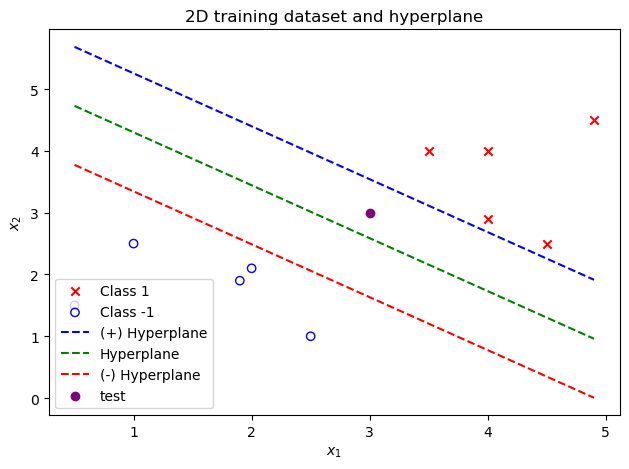

### Predicting x* = [3,3]

In [264]:
class_pred_33 = calc_h(w, [3,3], b)
print(class_pred_33)
class_pred_33 < margin


0.35423594316927165


True

This point is not in the margin, as we can reliably see the test point laying above (outside of) the margin. We can see that the model would classify this point with class 1.

###  c. [15 pts] Numerically verify that Karush-Kuhn-Tucker (KKT) conditions are satisfied for data points above using the objective equation below
## L = (λ/2)*w^2 − {i=1->N} ai [ yi(wxi +b)−1 ].
### Use the same a from Question a.

### d. [15 pts] Using the Lagrangian multiplier, a = [0.414,0,0,0.018,0,0,0.018,0,0.414,0], confirm that KKT conditions are satisfied. Find the hyperplane equation and find the support vectors. Determine if a point (x∗ = [3,3],y∗ = 1) is in a margin. Guess a possible slack variable ξi for the point, x∗ that satisfies the KKT condition